In [1]:
# src/data_visualization.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

In [2]:
# Load environment variables
load_dotenv()

True

In [3]:
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_PORT = os.getenv("MYSQL_PORT")
MYSQL_DB = os.getenv("MYSQL_DB")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")

In [4]:
# Connect to database
connection_string = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
engine = create_engine(connection_string)

In [5]:
# Read data
df = pd.read_sql("SELECT * FROM network_logs", engine)
print("Data loaded for visualization — shape:", df.shape)

Data loaded for visualization — shape: (410, 9)


In [7]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

C:\Users\nisha\AppData\Local\Temp\ipykernel_15388\1516735047.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="latency_ms", data=df, estimator="mean", ci=None, palette="viridis")
C:\Users\nisha\AppData\Local\Temp\ipykernel_15388\1516735047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="latency_ms", data=df, estimator="mean", ci=None, palette="viridis")


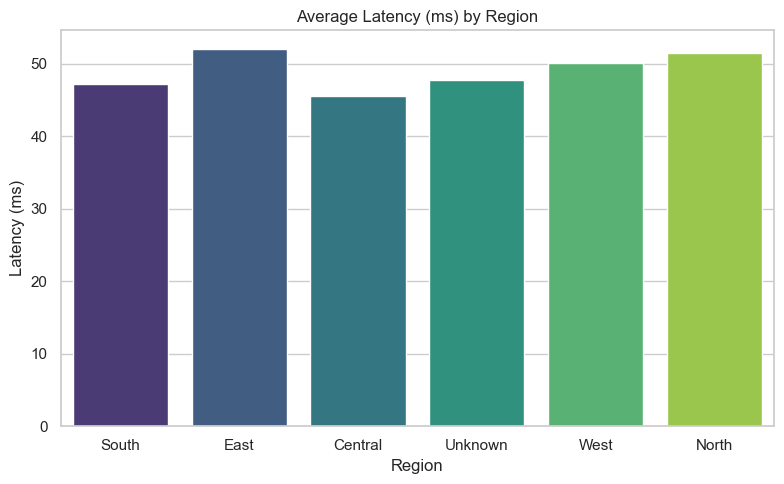

In [8]:
# -------------------------------
# 1. Latency per Region
# -------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="region", y="latency_ms", data=df, estimator="mean", ci=None, palette="viridis")
plt.title("Average Latency (ms) by Region")
plt.xlabel("Region")
plt.ylabel("Latency (ms)")
plt.tight_layout()
plt.show()

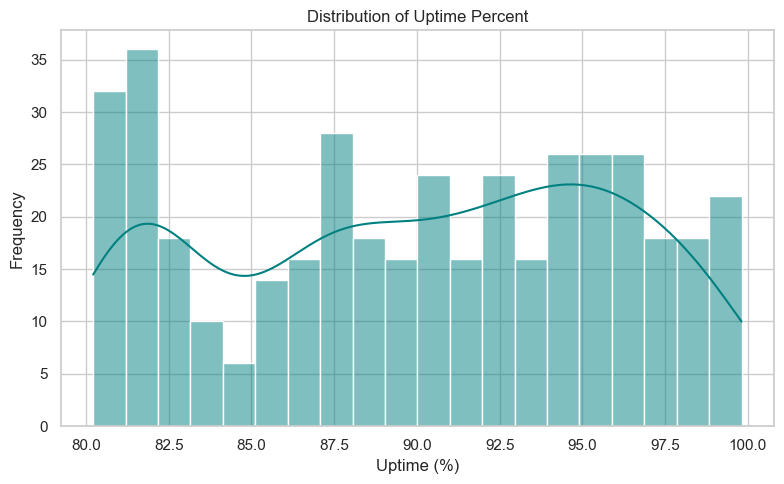

In [9]:

# -------------------------------
# 2️. Uptime Distribution
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["uptime_percent"], bins=20, kde=True, color="teal")
plt.title("Distribution of Uptime Percent")
plt.xlabel("Uptime (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

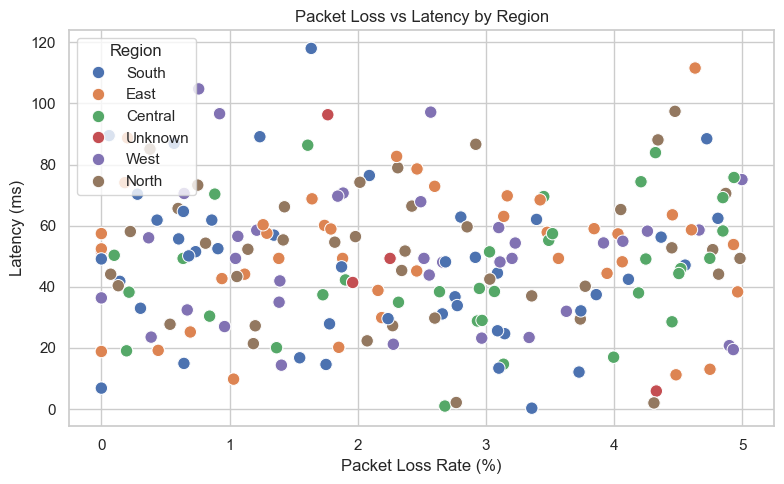

In [10]:
# -------------------------------
# 3️. Packet Loss vs Latency (Scatter)
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x="packet_loss_rate", y="latency_ms", hue="region", data=df, s=80)
plt.title("Packet Loss vs Latency by Region")
plt.xlabel("Packet Loss Rate (%)")
plt.ylabel("Latency (ms)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_15388\3771738376.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")


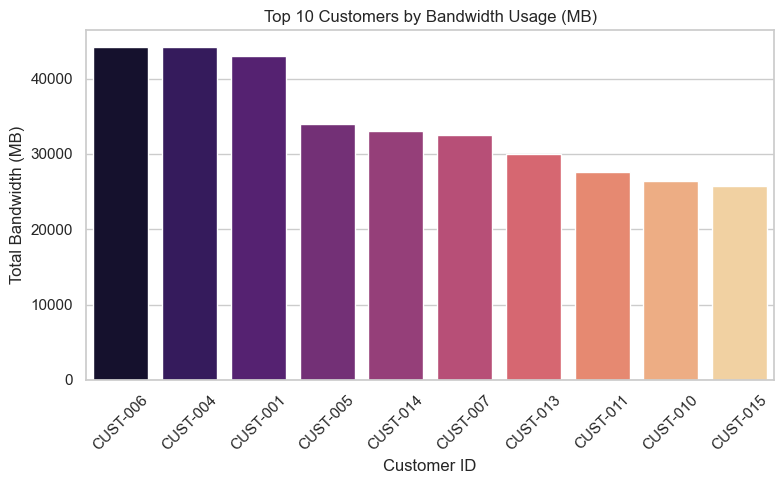

In [11]:
# -------------------------------
# 4️. Bandwidth Usage per Customer
# -------------------------------
top_customers = (
    df.groupby("customer_id")["bandwidth_usage_mb"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")
plt.title("Top 10 Customers by Bandwidth Usage (MB)")
plt.xlabel("Customer ID")
plt.ylabel("Total Bandwidth (MB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()